In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [170]:
data = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')

In [38]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [139]:
# Having a cabin number is correlated with survival?
pd.pivot_table(data_final, index="Survived", columns="cabin_type", values='Pclass', aggfunc='count')
# The number of cabins is correlated with survival?
# pd.pivot_table(data, index="Survived", columns="cabin_number", values='Pclass', aggfunc='count')

cabin_type,A,B,C,D,E,F,G,T,U
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [41]:
def plot_corr_heatmap(_data, cmap="coolwarm"):
    # Only numeric columns are selected
    numeric_data = _data.select_dtypes(include=["number"])
    sns.heatmap(numeric_data.corr(), center=0, cmap=cmap, linewidth=.5 )
    plt.show()

In [7]:
# Create "is_female" columns
# Missing age => relation between sex, parch, sibsp and class/fare?
# Remove PassengerId, Name, Ticket since they do not look like a good source of information
# Take a look at Cabin

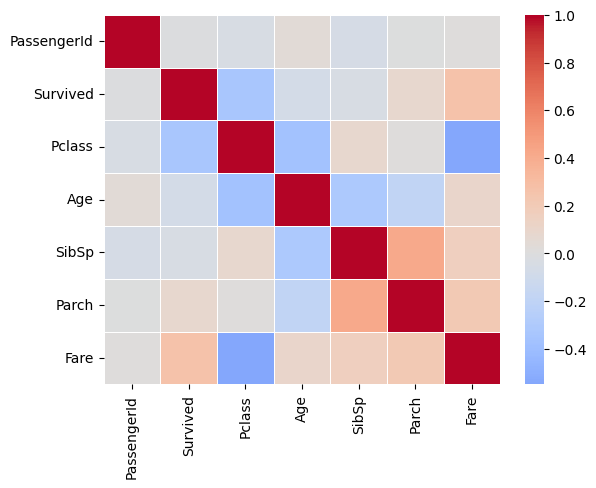

In [42]:
plot_corr_heatmap(data)
# Pclass and ticket fare have a noticed correlation, and a minor one between 
# sibligs/spouse and parent/children and age

In [76]:
data.info()
# Age has some null values, we'll try to stimated an average value considering the class, 
# sibligs/spouse and parent/children values
# The cabil value will be ignored 
# Embarked will be replace with a default value?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Quizas embarked se podría reemplazar por valores numericos y mirar si tienen alguna correlacion?
# Con ese dato quizas se podría ajustar ocn otros valores
# Como primera aproximación le pondremos un valor 
# El % de datos que faltan no parece significativo

In [45]:
# Create KNN imputer
def age_imputer(data):
    knn_imputer = KNNImputer(n_neighbors=7)
    columns_to_impute = ["Age", "Pclass", "SibSp", "Parch"]
    
    data_imputed = pd.DataFrame(knn_imputer.fit_transform(data[columns_to_impute]), columns=columns_to_impute)
    
    #data_imputed.info()
    data[columns_to_impute]=data_imputed

In [46]:
def is_female_imputer(data):
    data['IsFemale']=data['Sex'].apply(lambda x: 0 if x == 'male' else (1 if x == 'female' else -1))

In [47]:
def embarked_encoder(data):
    data['C'] = data['Embarked'].apply(lambda x: 1 if x == 'C' else 0)
    data['S'] = data['Embarked'].apply(lambda x: 1 if x == 'S' else 0)
    data['Q'] = data['Embarked'].apply(lambda x: 1 if x == 'Q' else 0)
    data['N'] = data['Embarked'].apply(lambda x: 1 if x not in ['C', 'S', 'Q'] else 0)

In [141]:
def feature_dropper(data):
    data.drop(["PassengerId","Name","Sex","Ticket","Cabin","Embarked","cabin_type"], axis=1, inplace=True)

In [140]:
def cabin_info_imputer(data):    
    data["cabin_type"] = data["Cabin"].str[0].fillna("U")
        
    data['CTA'] = data['cabin_type'].apply(lambda x: 1 if x[0] == 'A' else 0)
    data['CTB'] = data['cabin_type'].apply(lambda x: 1 if x[0] == 'B' else 0)
    data['CTC'] = data['cabin_type'].apply(lambda x: 1 if x[0] == 'C' else 0)
    data['CTD'] = data['cabin_type'].apply(lambda x: 1 if x[0] == 'D' else 0)
    data['CTE'] = data['cabin_type'].apply(lambda x: 1 if x[0] == 'E' else 0)
    data['CTF'] = data['cabin_type'].apply(lambda x: 1 if x[0] == 'F' else 0)
    data['CTG'] = data['cabin_type'].apply(lambda x: 1 if x[0] == 'G' else 0)
    data['CTT'] = data['cabin_type'].apply(lambda x: 1 if x[0] == 'T' else 0)
    data['CTN'] = data['cabin_type'].apply(lambda x: 1 if x not in ['A','B','C','D','E','F','G','T'] else 0)

    data["cabin_number"] = data["Cabin"].str.split(" ").apply(lambda x: len(x) if isinstance(x, list) else 0)

In [124]:
def imputer(data):
    data_imputer = data.copy()
    age_imputer(data_imputer)
    is_female_imputer(data_imputer)
    cabin_info_imputer(data_imputer)
    embarked_encoder(data_imputer)
    feature_dropper(data_imputer)
    feature_transform(data_imputer)
    
    return data_imputer

In [171]:
data_final = imputer(data)

In [143]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    float64
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    float64
 4   Parch         891 non-null    float64
 5   Fare          891 non-null    float64
 6   IsFemale      891 non-null    int64  
 7   CTA           891 non-null    int64  
 8   CTB           891 non-null    int64  
 9   CTC           891 non-null    int64  
 10  CTD           891 non-null    int64  
 11  CTE           891 non-null    int64  
 12  CTF           891 non-null    int64  
 13  CTG           891 non-null    int64  
 14  CTT           891 non-null    int64  
 15  CTN           891 non-null    int64  
 16  cabin_number  891 non-null    int64  
dtypes: float64(5), int64(12)
memory usage: 118.5 KB


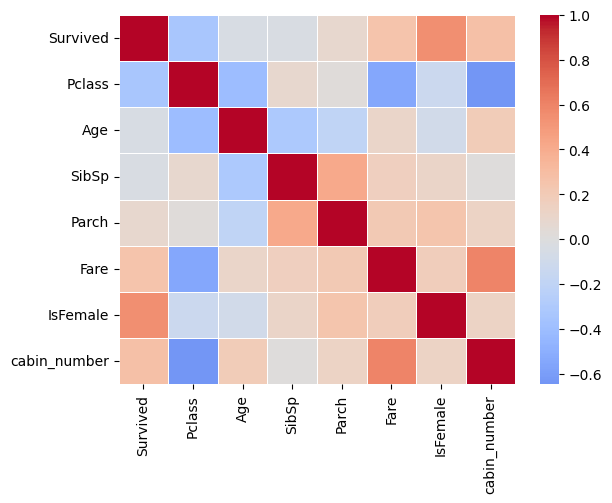

In [77]:
plot_corr_heatmap(data_final)

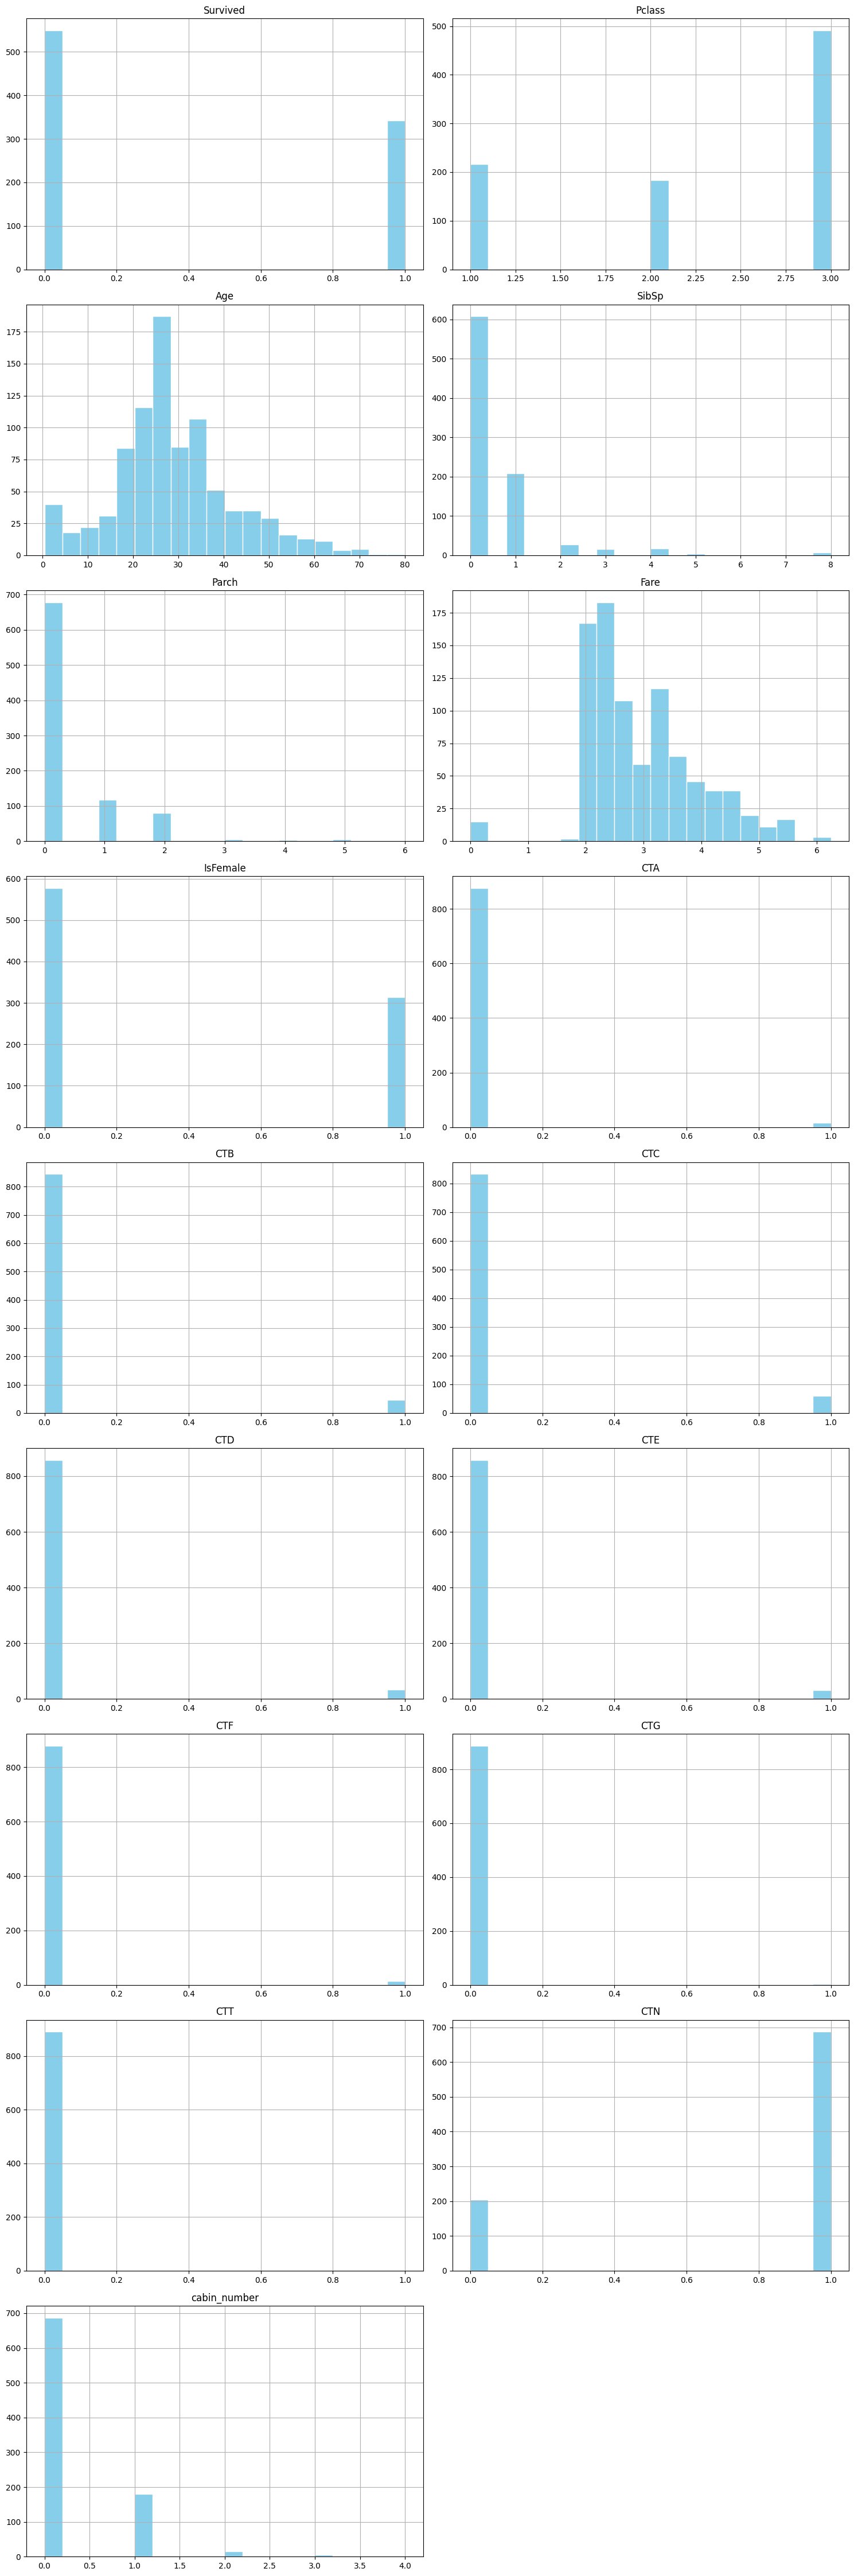

In [147]:
data_numeric_columns = data_final.select_dtypes(include=['number']).columns

plot_cols = 2
plot_rows = (len(data_numeric_columns) + plot_cols - 1) // plot_cols
fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(15, 5 * plot_rows))

for i, column in enumerate(data_numeric_columns):
    row, col = divmod(i, plot_cols) 
    ax = axes[row, col] if plot_rows > 1 else axes[col]
    data_final[column].hist(ax=ax, bins=20, color="skyblue", edgecolor="white")
    ax.set_title(column)

for j in range(len(data_numeric_columns), plot_rows * plot_cols):
    row, col = divmod(j, plot_cols)
    fig.delaxes(axes[row, col] if plot_rows > 1 else axes[col])

plt.tight_layout()
plt.show()

# Age seems to have a normal distribution per se
# Fare may be transformed to a log distribution

In [100]:
def feature_transform(data):
    data['Fare'] = np.log(data.Fare+1)

In [106]:
from sklearn.preprocessing import StandardScaler

In [148]:
def preprocess(data):
    scaler = StandardScaler()
    
    data_numeric_columns = data.select_dtypes(include=['number']).columns

    X_data = data.copy();
    y_data = None;
    
    if "Survived" in data_numeric_columns:        
        X_data = data.drop(["Survived"], axis=1)
        y = data["Survived"]
        
        y_data = y.to_numpy()
    
    X_data_numeric_columns = X_data.select_dtypes(include=['number']).columns
    X_data[X_data_numeric_columns] = scaler.fit_transform(X_data[X_data_numeric_columns])
    
    return X_data, y_data

In [172]:
X_data, y_data = preprocess(data_final)

In [173]:
X_data

,Pclass,Age,SibSp,Parch,Fare,IsFemale,CTA,CTB,CTC,CTD,CTE,CTF,CTG,CTT,CTN,cabin_number
0,0.827377,-0.527585,0.432793,-0.473674,-0.879741,-0.737695,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925,-0.488483
1,-1.566107,0.669421,0.432793,-0.473674,1.361220,1.355574,-0.130856,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,-1.835115,1.340249
2,0.827377,-0.228333,-0.474545,-0.473674,-0.798540,1.355574,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925,-0.488483
3,-1.566107,0.444983,0.432793,-0.473674,1.062038,1.355574,-0.130856,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,-1.835115,1.340249
4,0.827377,0.444983,-0.474545,-0.473674,-0.784179,-0.737695,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925,-0.488483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.153520,-0.474545,-0.473674,-0.333698,-0.737695,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925,-0.488483
887,-1.566107,-0.752023,-0.474545,-0.473674,0.487082,1.355574,-0.130856,4.237623,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,-1.835115,1.340249
888,0.827377,-0.687898,0.432793,2.008933,0.242007,1.355574,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925,-0.488483
889,-1.566107,-0.228333,-0.474545,-0.473674,0.487082,-0.737695,-0.130856,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,-1.835115,1.340249


In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

param_grid = [{
    "n_estimators": [10,100, 200, 500, 1000], 
    "max_depth": [None, 5, 10, 15], 
    "min_samples_split":[2,3,4,5]
}]

grid_search = GridSearchCV(rfc, param_grid, cv=4, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10, 15],
                          'min_samples_split': [2, 3, 4, 5],
                          'n_estimators': [10, 100, 200, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [154]:
final_rfc = grid_search.best_estimator_
final_rfc

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=500)

In [ ]:
#max_depth:10, min_samples_split:5, n_estimators:500
# probar a correrlo con un 75 por ciento y evaluar el 25 restante
# summitear los resultados

In [156]:
data_test_final = imputer(data_test)

In [166]:
data_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    float64
 1   Age           418 non-null    float64
 2   SibSp         418 non-null    float64
 3   Parch         418 non-null    float64
 4   Fare          418 non-null    float64
 5   IsFemale      418 non-null    int64  
 6   CTA           418 non-null    int64  
 7   CTB           418 non-null    int64  
 8   CTC           418 non-null    int64  
 9   CTD           418 non-null    int64  
 10  CTE           418 non-null    int64  
 11  CTF           418 non-null    int64  
 12  CTG           418 non-null    int64  
 13  CTT           418 non-null    int64  
 14  CTN           418 non-null    int64  
 15  cabin_number  418 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 52.4 KB


In [165]:
data_test_final=data_test_final.fillna(method="ffill")

/tmp/ipykernel_71668/4141968302.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_test_final=data_test_final.fillna(method="ffill")


In [174]:
X_data_test, _ = preprocess(data_test_final)

In [176]:
predictions = final_rfc.predict(X_data_test)

In [178]:
final_df = pd.DataFrame(data_test["PassengerId"])
final_df['Survived']=predictions
final_df.to_csv("data/predictions.csv", index=False)

In [179]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
